# 第1章 统计学习方法概论

1．统计学习是关于计算机基于数据构建概率统计模型并运用模型对数据进行分析与预测的一门学科。统计学习包括监督学习、非监督学习、半监督学习和强化学习。

2．统计学习方法三要素——模型、策略、算法，对理解统计学习方法起到提纲挈领的作用。

3．本书主要讨论监督学习，监督学习可以概括如下：从给定有限的训练数据出发， 假设数据是独立同分布的，而且假设模型属于某个假设空间，应用某一评价准则，从假设空间中选取一个最优的模型，使它对已给训练数据及未知测试数据在给定评价标准意义下有最准确的预测。

4．统计学习中，进行模型选择或者说提高学习的泛化能力是一个重要问题。如果只考虑减少训练误差，就可能产生过拟合现象。模型选择的方法有正则化与交叉验证。学习方法泛化能力的分析是统计学习理论研究的重要课题。

5．分类问题、标注问题和回归问题都是监督学习的重要问题。本书中介绍的统计学习方法包括感知机、$k$近邻法、朴素贝叶斯法、决策树、逻辑斯谛回归与最大熵模型、支持向量机、提升方法、EM算法、隐马尔可夫模型和条件随机场。这些方法是主要的分类、标注以及回归方法。它们又可以归类为生成方法与判别方法。


### 使用最小二乘法拟和曲线

高斯于1823年在误差$e_1,…,e_n$独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！
对于数据$(x_i, y_i)   (i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时$L2$范数(残差平方和)最小时，$h(x)$ 和 $y$ 相似度最高，更拟合

一般的$H(x)$为$n$次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ ，使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正态分布的噪音干扰，用多项式去拟合【例1.1 11页】

In [1]:
import numpy as np # 导入numpy包，为numpy起别名为np
import scipy as sp  # 导入scipy包，为numpy起别名为sp
from scipy.optimize import leastsq  # 导入scipy库里面的leastsq函数
import matplotlib.pyplot as plt # 导入pyplot包，命名为plt
%matplotlib inline

* ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

In [2]:
# 1、目标函数，进行拟合的数据点都分布在这条正弦曲线附近

def real_func(x): #  def real_func(x) 定义一个 sin(2np.pix) 的函数
    return np.sin(2*np.pi*x) 

#/2、多项式   np.poly1d([1,2,3]) 生成  1𝑥2+2𝑥1+3𝑥0    
def fit_func(p, x):# def fit_func(p, x) 定义一个多项式函数
    f = np.poly1d(p) # p为多项式的参数,x为下面linspace(0, 1, 10)取得的点
    return f(x)  

#/3、残差  误差函数，所谓误差就是指我们拟合的曲线的值对应真实值的差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y # 返回ret的值使residuals_func()函数获得残差。
    return ret

In [3]:
# 0为初始值，1为步长，10为终止值。linspace是Matlab中的均分计算指令，用于产生x1,x2之间的N点行线性的矢量。
x = np.linspace(0, 1, 10)   # 表示生成十个数，生成的这10个数是等间隔数列，间隔均为1
x_points = np.linspace(0, 1, 1000)   # x 为十个噪音点，x_points 为用来画曲线的1000个点。

y_ = real_func(x)  # y_ 为真实函数值。
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]   # y 为加上正态分布噪音的目标函数的测量值

# 5、关于拟合的曲线的函数
def fitting(M=0):
   
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)  # M为多项式的次数，随机初始化多项式参数，生成M+1个随机数的列表，这样poyld函数返回的多项式次数就是M
    # 最小二乘法，三个参数：误差函数、函数参数列表，数据点
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    #p_init里放的是k、b的初始值，这个值可以随意指定。往后随着迭代次数增加，k、b将会不断变化，使得residuals_func函数的值越来越小。
    # residuals_func函数为误差函数，我们的目标就是不断调整k和b使得residuals_func不断减小。
    # leastsq的返回值是一个tuple，它里面有两个元素。
    
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real') 
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend() # 图例
    return p_lsq

### M=0

Fitting Parameters: [0.01659586]


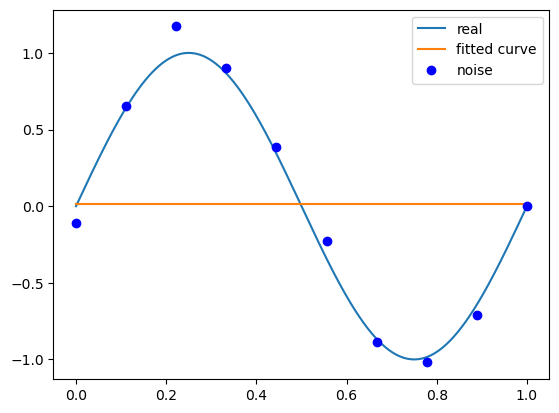

In [4]:
#  下面分别为选取多项式次数M不同时的运行结果：
# M=0 即多项式为常数时 
p_lsq_0 = fitting(M=0)

### M=1

Fitting Parameters: [-1.38891641  0.71105407]


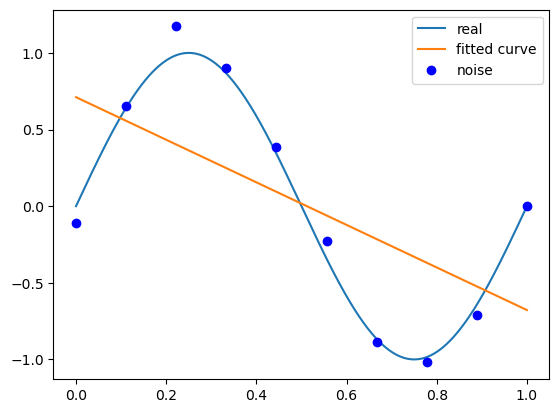

In [5]:
# M=1，即多项式为一次项时
#Fitting Parameters为优化后的多项式系数。
p_lsq_1 = fitting(M=1)

### M=3 

Fitting Parameters: [ 23.13343027 -35.18366212  12.26066371  -0.16025217]


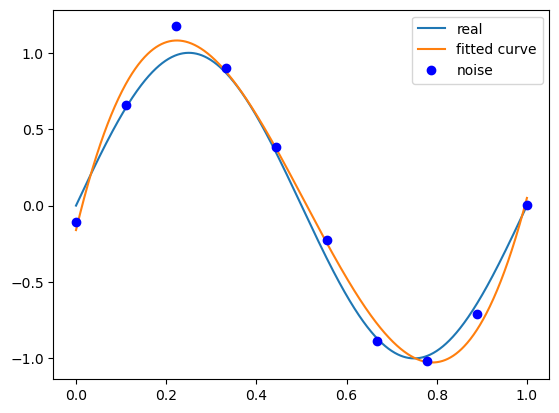

In [6]:
# M=3，即多项式为三次项时，可看出拟合的比较不错
p_lsq_3 = fitting(M=3)

### M=9

Fitting Parameters: [ 6.80991924e+03 -2.79781457e+04  4.68635121e+04 -4.08990719e+04
  1.95296636e+04 -4.72701373e+03  3.76567247e+02  2.06111942e+01
  4.07234057e+00 -1.10225015e-01]


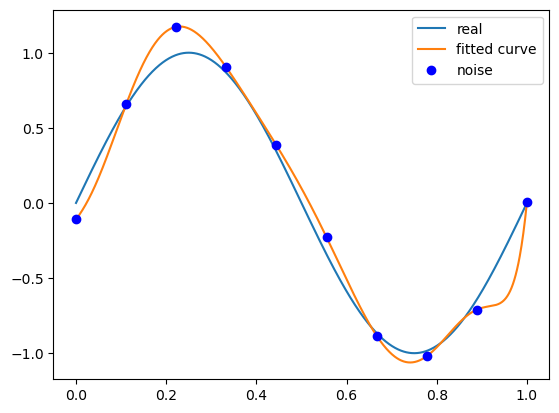

In [7]:
# M=9，多项式曲线通过了每个数据点，但是造成了过拟合
p_lsq_9 = fitting(M=9)

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

### 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [8]:
regularization = 0.0001 # 选择正则化因子为 0.0001。


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y # 重新定义残差函数，将原有的残差值添加正则化项。
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [9]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1) # 再次初始化最小二乘法，然后画图。
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

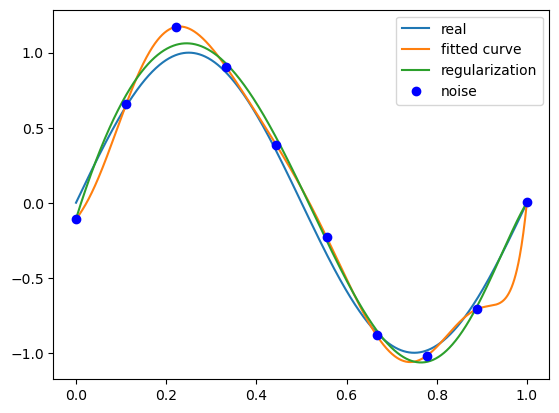

In [10]:
plt.plot(x_points, real_func(x_points), label='real') # 目标函数图像
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization') # 加入了正则化项的多项式图像
plt.plot(x, y, 'bo', label='noise')# 噪声点（真实值）
plt.legend()# 结果

## 第1章统计学习方法概论-习题
**撰写人：**胡锐锋-天国之影-Relph

**github地址：**https://github.com/datawhalechina/statistical-learning-method-solutions-manual

### 习题1.1
&emsp;&emsp;说明伯努利模型的极大似然估计以及贝叶斯估计中的统计学习方法三要素。伯努利模型是定义在取值为0与1的随机变量上的概率分布。假设观测到伯努利模型$n$次独立的数据生成结果，其中$k$次的结果为1，这时可以用极大似然估计或贝叶斯估计来估计结果为1的概率。

**解答：**

伯努利模型的极大似然估计以及贝叶斯估计中的**统计学习方法三要素**如下：  
1. **极大似然估计**  
**模型：** $\mathcal{F}=\{f|f_p(x)=p^x(1-p)^{(1-x)}\}$  
**策略：** 最大化似然函数  
**算法：** $\displaystyle \mathop{\arg\min}_{p} L(p)= \mathop{\arg\min}_{p} \binom{n}{k}p^k(1-p)^{(n-k)}$
2. **贝叶斯估计**  
**模型：** $\mathcal{F}=\{f|f_p(x)=p^x(1-p)^{(1-x)}\}$  
**策略：** 求参数期望  
**算法：**
$$\begin{aligned}  E_\pi\big[p \big| y_1,\cdots,y_n\big]
& = {\int_0^1}p\pi (p|y_1,\cdots,y_n) dp \\
& = {\int_0^1} p\frac{f_D(y_1,\cdots,y_n|p)\pi(p)}{\int_{\Omega}f_D(y_1,\cdots,y_n|p)\pi(p)dp}dp \\
& = {\int_0^1}\frac{p^{k+1}(1-p)^{(n-k)}}{\int_0^1 p^k(1-p)^{(n-k)}dp}dp
\end{aligned}$$

**伯努利模型的极大似然估计：**  
定义$P(Y=1)$概率为$p$，可得似然函数为：$$L(p)=f_D(y_1,y_2,\cdots,y_n|\theta)=\binom{n}{k}p^k(1-p)^{(n-k)}$$方程两边同时对$p$求导，则：$$\begin{aligned}
0 & = \binom{n}{k}[kp^{k-1}(1-p)^{(n-k)}-(n-k)p^k(1-p)^{(n-k-1)}]\\
& = \binom{n}{k}[p^{(k-1)}(1-p)^{(n-k-1)}(m-kp)]
\end{aligned}$$可解出$p$的值为$p=0,p=1,p=k/n$，显然$\displaystyle P(Y=1)=p=\frac{k}{n}$  

**伯努利模型的贝叶斯估计：**  
定义$P(Y=1)$概率为$p$，$p$在$[0,1]$之间的取值是等概率的，因此先验概率密度函数$\pi(p) = 1$，可得似然函数为： $$L(p)=f_D(y_1,y_2,\cdots,y_n|\theta)=\binom{n}{k}p^k(1-p)^{(n-k)}$$  
根据似然函数和先验概率密度函数，可以求解$p$的条件概率密度函数：$$\begin{aligned}\pi(p|y_1,\cdots,y_n)&=\frac{f_D(y_1,\cdots,y_n|p)\pi(p)}{\int_{\Omega}f_D(y_1,\cdots,y_n|p)\pi(p)dp}\\
&=\frac{p^k(1-p)^{(n-k)}}{\int_0^1p^k(1-p)^{(n-k)}dp}\\
&=\frac{p^k(1-p)^{(n-k)}}{B(k+1,n-k+1)}
\end{aligned}$$所以$p$的期望为：$$\begin{aligned}
E_\pi[p|y_1,\cdots,y_n]&={\int}p\pi(p|y_1,\cdots,y_n)dp \\
& = {\int_0^1}\frac{p^{(k+1)}(1-p)^{(n-k)}}{B(k+1,n-k+1)}dp \\
& = \frac{B(k+2,n-k+1)}{B(k+1,n-k+1)}\\
& = \frac{k+1}{n+2}
\end{aligned}$$
$\therefore \displaystyle P(Y=1)=\frac{k+1}{n+2}$

### 习题1.2
&emsp;&emsp;通过经验风险最小化推导极大似然估计。证明模型是条件概率分布，当损失函数是对数损失函数时，经验风险最小化等价于极大似然估计。

**解答：**

假设模型的条件概率分布是$P_{\theta}(Y|X)$，现推导当损失函数是对数损失函数时，极大似然估计等价于经验风险最小化。
极大似然估计的似然函数为：$$L(\theta)=\prod_D P_{\theta}(Y|X)$$两边取对数：$$\ln L(\theta) = \sum_D \ln P_{\theta}(Y|X) \\ 
\mathop{\arg \max}_{\theta} \sum_D \ln P_{\theta}(Y|X) = \mathop{\arg \min}_{\theta} \sum_D (- \ln P_{\theta}(Y|X))$$ 
反之，经验风险最小化等价于极大似然估计，亦可通过经验风险最小化推导极大似然估计。

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

本文代码更新地址：https://github.com/fengdu78/lihang-code

习题解答：https://github.com/datawhalechina/statistical-learning-method-solutions-manual

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)